# Purpose
The purpose of this notebook is investigate a visual version of Lagrange Multiplier tests of the need for mixed logit models.

The original Lagrange Multiplier tests being referred to were put forth in
> McFadden, Daniel, and Kenneth Train. "Mixed MNL models for discrete response." Journal of applied Econometrics 15, no. 5 (2000): 447-470.

McFadden and Train present their Lagrange Multiplier tests as "a specification test based solely on MNL model estimates that determine if mixing is needed" (2000; p.456).
In particular, one uses a likelihood-ratio test based on the asymptotic sampling distribution of a MNL model estimated with one's original variables and a set of auxillary variables ($z_{it}$).
This test uses a linear-in-parameters specification of the auxillary variables $z_{it}$.

One question that immediately comes to my mind is the possibility of mis-specifying how the auxillary variables are related to the choice being modeled.
I imagine (but am not sure) that this mis-specification will negatively affect the power of the test.
This notebook demonstrates the use of marginal model plots as an alternative means of assessing whether the auxillary variables are related to one's choice (i.e., whether mixing is suspected).
These visual assessments are to be considered an "alternative model-free" generalization of Lagrange Multiplier tests that depend on the specification of the alternative model under consideration.

In [1]:
import sys
from collections import OrderedDict
from importlib import reload

import scipy.stats
import pandas as pd
import numpy as np

import pylogit as pl

sys.path.insert(0, '../src')
from visualization import predictive_viz as viz

%matplotlib inline

# Load the car data

In [2]:
car_df = pd.read_csv("../data/processed/model_ready_car_data.csv")

# Create the utility specification

In [3]:
car_mnl_spec, car_mnl_names = OrderedDict(), OrderedDict()

cols_and_display_names =\
    [('price_over_log_income', 'Price over log(income)'),
     ('range_over_100', 'Range (units: 100mi)'),
     ('acceleration_over_10', 'Acceleration (units: 0.1sec)'),
     ('top_speed_over_100', 'Top speed (units: 0.01mph)'),
     ('pollution', 'Pollution'),
     ('vehicle_size_over_10', 'Size'),
     ('big_enough', 'Big enough'),
     ('luggage_space', 'Luggage space'),
     ('tens_of_cents_per_mile', 'Operation cost'),
     ('station_availability', 'Station availability'),
     ('sports_utility_vehicle', 'Sports utility vehicle'),
     ('sports_car', 'Sports car'),
     ('station_wagon', 'Station wagon'),
     ('truck', 'Truck'),
     ('van', 'Van'),
     ('electric', 'EV'),
     ('electric_commute_lte_5mi', 'Commute < 5 & EV'),
     ('electric_and_college', 'College & EV'),
     ('compressed_natural_gas', 'CNG'),
     ('methanol', 'Methanol'),
     ('methanol_and_college', 'College & Methanol')]
    
for col, display_name in cols_and_display_names:
    car_mnl_spec[col] = 'all_same'
    car_mnl_names[col] = display_name


# Estimate the MNL model

In [4]:
# Initialize the mnl model
car_mnl = pl.create_choice_model(data=car_df,
                                 alt_id_col='alt_id',
                                 obs_id_col='obs_id',
                                 choice_col='choice',
                                 specification=car_mnl_spec,
                                 model_type='MNL',
                                 names=car_mnl_names)

# Create the initial variables for model estimation
num_vars = len(car_mnl_names)
initial_vals = np.zeros(num_vars)

# Estimate the mnl model
fit_vals = car_mnl.fit_mle(initial_vals,
                           method='L-BFGS-B',
                           just_point=True)['x']
# Note ridge=1e-7 produces the same results as non-regularized MLE
car_mnl.fit_mle(fit_vals, method='BFGS')

# Look at the estimation results
car_mnl.get_statsmodels_summary()

/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/pylogit/choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/scipy/optimize/_minimize.py:511: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  RuntimeWarning)


Log-likelihood at zero: -8,338.8486
Initial Log-likelihood: -7,391.8638
Estimation Time for Point Estimation: 0.15 seconds.
Final log-likelihood: -7,391.8300


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/scipy/optimize/_minimize.py:511: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      choice   No. Observations:                4,654
Model:             Multinomial Logit Model   Df Residuals:                    4,633
Method:                                MLE   Df Model:                           21
Date:                     Wed, 27 May 2020   Pseudo R-squ.:                   0.114
Time:                             15:52:35   Pseudo R-bar-squ.:               0.111
AIC:                            14,825.660   Log-Likelihood:             -7,391.830
BIC:                            14,961.015   LL-Null:                    -8,338.849
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Price over log(income)          -0.1854      0.027     -6.796      0.000      -0.239      -0.132
Range (units: 100mi)             0.3501      0.027     13.052      0.000       0.298       0.403
Acceleration (units: 0.1sec)    -0.7160      0.111     -6.472      0.000      -0.933      -0.499
Top speed (units: 0.01mph)       0.2612      0.081      3.228      0.001       0.103       0.420
Pollution                       -0.4441      0.102     -4.367      0.000      -0.643      -0.245
Size                             0.9345      0.316      2.953      0.003       0.314       1.555
Big enough                       0.1432      0.077      1.853      0.064      -0.008       0.295
Luggage space                    0.5009      0.191      2.623      0.009       0.127       0.875
Operation cost                  -0.7679      0.076    -10.131      0.000      -0.916      -0.619
Station availability             0.4133      0.096      4.294      0.000       0.225       0.602
Sports utility vehicle           0.8201      0.141      5.830      0.000       0.544       1.096
Sports car                       0.6370      0.148      4.298      0.000       0.347       0.928
Station wagon                   -1.4367      0.062    -23.139      0.000      -1.558      -1.315
Truck                           -1.0168      0.049    -20.753      0.000      -1.113      -0.921
Van                             -0.7989      0.047    -16.864      0.000      -0.892      -0.706
EV                              -0.1786      0.172     -1.041      0.298      -0.515       0.158
Commute < 5 & EV                 0.1983      0.084      2.374      0.018       0.035       0.362
College & EV                     0.4426      0.109      4.058      0.000       0.229       0.656
CNG                              0.3450      0.092      3.744      0.000       0.164       0.526
Methanol                         0.3134      0.103      3.051      0.002       0.112       0.515
College & Methanol               0.2284      0.089      2.576      0.010       0.055       0.402
================================================================================================
"""

In [5]:
print(np.round(pd.concat([car_mnl.params,
                    car_mnl.standard_errors],
                   axis=1),
               decimals=3).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  parameters &  std\_err \\
\midrule
Price over log(income)       &      -0.185 &    0.027 \\
Range (units: 100mi)         &       0.350 &    0.027 \\
Acceleration (units: 0.1sec) &      -0.716 &    0.111 \\
Top speed (units: 0.01mph)   &       0.261 &    0.081 \\
Pollution                    &      -0.444 &    0.102 \\
Size                         &       0.934 &    0.316 \\
Big enough                   &       0.143 &    0.077 \\
Luggage space                &       0.501 &    0.191 \\
Operation cost               &      -0.768 &    0.076 \\
Station availability         &       0.413 &    0.096 \\
Sports utility vehicle       &       0.820 &    0.141 \\
Sports car                   &       0.637 &    0.148 \\
Station wagon                &      -1.437 &    0.062 \\
Truck                        &      -1.017 &    0.049 \\
Van                          &      -0.799 &    0.047 \\
EV                           &      -0.179 &    0.172 \\
Commute < 5 \& EV

# Replication Results

The original modeling results have been replicated. To do so, I needed to change the vehicle fuel types in the mlogit data to correct a likely transcription error.

# MNL Model Checking

In [6]:
# Simulate values from the sampling distribution of coefficients
cov_matrix = np.linalg.inv(-1 * car_mnl.hessian)
mnl_sampling_dist =\
    scipy.stats.multivariate_normal(mean=car_mnl.params.values,
                                    cov=cov_matrix)

In [7]:
# Take Draws from the sampling distribution
num_draws = 1000
np.random.seed(325)
simulated_coefs = mnl_sampling_dist.rvs(num_draws)
simulated_coefs.shape

(1000, 21)

In [8]:
# Predict the model probabilities
simulated_probs =\
    car_mnl.predict(car_df,
                    param_list=[simulated_coefs.T, None, None, None])

# Simulate y from the sampling distribution
likelihood_sim_y =\
    viz.simulate_choice_vector(simulated_probs,
                               car_df['obs_id'].values,
                               rseed=1122018)

# Create Auxillary Variables for Lagrange Multiplier Plots

In [9]:
# Get the rows_to_obs matrix
rows_to_obs = car_mnl.get_mappings_for_fit()['rows_to_obs']

# Get the mean attribute values for each observation
probs_to_obs = rows_to_obs.multiply(car_mnl.long_fitted_probs[:, None])

In [10]:
type(probs_to_obs)

scipy.sparse.coo.coo_matrix

In [11]:
probs_to_obs.shape

(27924, 4654)

In [12]:
car_mnl.design.shape

(27924, 21)

In [13]:
# Will have shape (num_obs, design[1])
x_mean_per_obs = probs_to_obs.T.dot(car_mnl.design)

# Will have same shape as the design matrix
long_x_mean_per_obs = rows_to_obs.dot(x_mean_per_obs)

# X - X_mean_per_obs
augmented_x = car_mnl.design - long_x_mean_per_obs

# z = 0.5 * (x - x_bar)^2
artificial_x = 0.5 * augmented_x**2

# Create helper function for plots

In [14]:
from sklearn.ensemble import (ExtraTreesClassifier,
                              ExtraTreesRegressor)

def make_bagger(X, Y,
                n_estimators=50,
                min_samples_leaf=10,
                random_state=None):
    if not isinstance(X, np.ndarray) or len(X.shape) != 1:
        msg = 'X MUST be a 1D ndarray'
        raise ValueError(msg)
    if not isinstance(Y, np.ndarray) or len(Y.shape) != 1:
        msg = 'Y MUST be a 1D ndarray'
        raise ValueError(msg)
    if ((Y < 1.0) & (Y > 0)).any():
        clf = ExtraTreesRegressor(
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  max_features=1,
                  random_state=random_state)
    else:
        clf = ExtraTreesClassifier(
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  max_features=1,
                  random_state=random_state)
    
    clf.fit(X[:, None], Y)
    return clf


def _plot_x_vs_bagged_y(x_vals,
                        y_vals,
                        color,
                        alpha,
                        label,
                        ax,
                        random_state=111):
    # Create the bagging classifier
    bagger = make_bagger(x_vals, y_vals, random_state=random_state)
    # Get the bagging probabilities
    if hasattr(bagger, 'predict_proba'):
        bagged_probs = bagger.predict_proba(x_vals[:, None])[:, 1]
    else:
        bagged_probs = bagger.predict(x_vals[:, None])
    
    # Plot the x_vals versus their predicted probabilities
    ax.plot(x_vals, bagged_probs,
            c=color, alpha=alpha, label=label)
    return None


def make_bagged_marginal_model_plot(probs,
                                    choices,
                                    ref_vals,
                                    sim_y=None,
                                    partitions=10,
                                    y_color=None,
                                    prob_color=None,
                                    sim_color=None,
                                    y_label='Observed',
                                    prob_label='Predicted',
                                    sim_label='Simulated',
                                    x_label=None,
                                    alpha=None,
                                    title=None,
                                    fontsize=12,
                                    figsize=(5, 3),
                                    fig_and_ax=None,
                                    legend=True,
                                    progress=True,
                                    show=True,
                                    output_file=None,
                                    dpi=500):
    """
    Creates a binned marginal model plot based on the given probability
    predictions, observed outcomes, and refernce values.

    Parameters
    ----------
    probs : 1D or 2D ndarray.
        Each element should be in [0, 1]. There should be 1 column for each
        set of predicted probabilities.
    choices : 1D ndarray.
        Each element should be either a zero or a one. Elements should denote
        whether the alternative corresponding to the given row was chosen or
        not. A 'one' corresponds to a an outcome of 'success'.
    ref_vals : 1D ndarray of floats.
        These should be the elements to plot on the x-axis. `ref_vals` should
        represent a continuous variable. Should have the same number of rows as
        `probs` and `choices`.
    sim_y : 2D ndarray or None, optional.
        Denotes the choices that were simulated based on `probs`. If passed,
        `sim_y.shape` MUST equal `probs.shape` in order to ensure that lines
        are plotted for the simulated choices versus `ref_vals`. This kwarg is
        useful because it shows one the reference distribution of choices
        versus `ref_vals` for choices that actually come from one's model.
        Default = None.
    partitions : positive int.
        Denotes the number of partitions to split one's data into for binning.
    y_color, prob_color, sim_color : matplotlib color, or `None`, optional.
        Determines the color that is used to plot the observed choices,
        predicted probabilities, and simulated choices versus `ref_vals`.
        Default is `None`.
    y_label, prob_label, sim_label : str, or None, optional.
        Denotes the label to be used for the lines relating the observed
        choices, predicted probabilities, and simulated choices to the
        `ref_vals`. Default == ['Observed', 'Predicted', 'Simulated'].
    x_label : str, or None, optional.
        The label for the x-axis of the plot. If None, the x-axis will be
        labeled 'Binned, Mean Reference Values.' Default is `None`.
    alpha : positive float in [0.0, 1.0], or `None`, optional.
        Determines the opacity of the elements drawn on the plot.
        0.0 == transparent and 1.0 == opaque. Default is `None`.
    title : str, or None, optional.
        Denotes the title to be displayed for the plot. Default is None.
    fontsize : int or None, optional.
        The fontsize to be used in the plot. Default is 12.
    figsize : 2-tuple of positive ints.
        Determines the size of the created figure. Default == (5, 3).
    fig_and_ax : list of matplotlib figure and axis, or `None`, optional.
        Determines whether a new figure will be created for the plot or whether
        the plot will be drawn on existing axes. If None, a new figure will be
        created. Default is `None`.
    legend : bool, optional.
        Determines whether a legend is printed for the plot. Default == True.
    progress : bool, optional.
        Determines whether a progressbar is displayed while making the plot.
        Default == True.
    show : bool, optional.
        Determines whether the figure is shown after plotting is complete.
        Default == True.
    output_file : str, or None, optional.
        Denotes the relative or absolute filepath (including the file format)
        that is to be used to save the plot. If None, the plot will not be
        saved to file. Default is None.
    dpi : positive int, optional.
        Denotes the number of 'dots per inch' for the saved figure. Will only
        be used if `output_file is not None`. Default == 500.

    Returns
    -------
    None.
    """
    # Make probs 2D if necessary
    probs = probs[:, None] if probs.ndim == 1 else probs

    # Sort the arguments, if necesssary
    sort_order = np.argsort(ref_vals)
    ref_vals = ref_vals[sort_order]
    probs = probs[sort_order, :]
    choices = choices[sort_order]
    if sim_y is not None:
        sim_y = sim_y[sort_order, :]

    # Create the figure and axes if need be
    if fig_and_ax is None:
        fig, ax = plt.subplots(1, figsize=figsize)
        fig_and_ax = [fig, ax]
    else:
        fig, ax = fig_and_ax

    # Choose colors for the plot if necesssary
    if y_color is None:
        y_color =\
            (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)
    if prob_color is None:
        prob_color =\
            (0.6509803921568628, 0.807843137254902, 0.8901960784313725)
    if sim_color is None:
        sim_color =\
            (0.792156862745098, 0.6980392156862745, 0.8392156862745098)

    # Create the progressbar iterator if desired
    if progress:
        description = "Plotting" if sim_y is None else "Plotting Simulations"
        prob_iterator = viz.PROGRESS(range(probs.shape[1]), desc=description)
    else:
        prob_iterator = range(probs.shape[1])

    #####
    # Plot the simulated reliability curves, if desired
    #####
    if sim_y is not None:
        for i in prob_iterator:
            current_label = sim_label if i == 0 else None
            _plot_x_vs_bagged_y(ref_vals,
                                sim_y[:, i],
                                sim_color,
                                alpha,
                                current_label,
                                ax,
                                random_state=111)

    # Create the progressbar iterator if desired
    if progress:
        prob_iterator = viz.PROGRESS(range(probs.shape[1]), desc="Plotting")
    else:
        prob_iterator = range(probs.shape[1])

    #####
    # Plot the probabilities versus the ref values.
    #####
    for col in prob_iterator:
        # Get the current line label and probabilities
        current_label = prob_label if col == 0 else None
        current_probs = probs[:, col]


        _plot_x_vs_bagged_y(ref_vals,
                            current_probs,
                            prob_color,
                            alpha,
                            current_label,
                            ax,
                            random_state=111)
    #####
    # Plot choices versus ref_vals
    #####
    # Make sure the 'true' relationship is not transparent
    observed_alpha = 1.0
    _plot_x_vs_bagged_y(ref_vals,
                        choices,
                        y_color,
                        observed_alpha,
                        y_label,
                        ax,
                        random_state=111)

    # Label the plot axes
    if x_label is None:
        ax.set_xlabel('Binned, Mean Reference Values', fontsize=fontsize)
    else:
        ax.set_xlabel(x_label, fontsize=fontsize)
    ax.set_ylabel('Bagged,\nMean\nProbability',
                  fontsize=fontsize, rotation=0, labelpad=40)

    # Make the title if desired
    if title is not None:
        ax.set_title(title, fontsize=fontsize)

    # Make the legend, if desired
    if legend:
        ax.legend(loc='best', fontsize=fontsize)

    # Despine the plot
    sbn.despine()

    # Save the plot if desired
    if output_file is not None:
        fig.tight_layout()
        fig.savefig(output_file, dpi=dpi, bbox_inches='tight')

    # Show the plot if desired
    if show:
        fig.show()
    return None


# Make the seven desired plots

In [15]:
import seaborn as sbn
import matplotlib.pyplot as plt

### 1. Log-Likelihood plot

../src/visualization/predictive_viz.py:2160: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


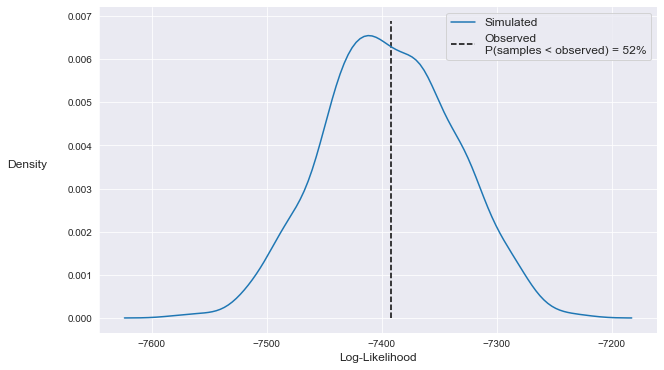

In [18]:
reload(viz)

sim_log_likes =\
    viz.compute_prior_predictive_log_likelihoods(likelihood_sim_y,
                                                 car_df,
                                                 "choices",
                                                 car_mnl)

# log_like_path = '../reports/figures/log-predictive-vehicle-choice-mnl.pdf'
log_like_path = None
viz.plot_predicted_log_likelihoods(sim_log_likes,
                                   car_mnl.llf,
                                   output_file=log_like_path)

### 2. Outcome Boxplot

../src/visualization/predictive_viz.py:2371: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


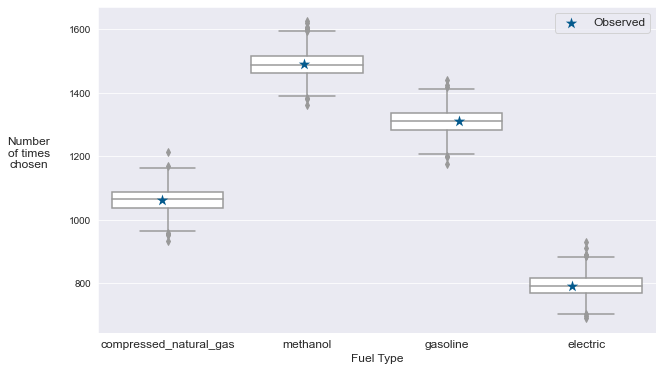

In [19]:
reload(viz)
# market_path = '../reports/figures/market-share-plot-vehicle-choice-mnl.pdf'
market_path = None

market_dict = dict(cng='compressed_natural_gas')

viz.plot_simulated_market_shares(car_df.fuel_type.values,
                                 likelihood_sim_y,
                                 car_df.choice.values,
                                 x_label='Fuel Type',
                                 y_label='Number\nof times\nchosen',
                                 display_dict=market_dict,
                                 output_file=market_path)

../src/visualization/predictive_viz.py:2371: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


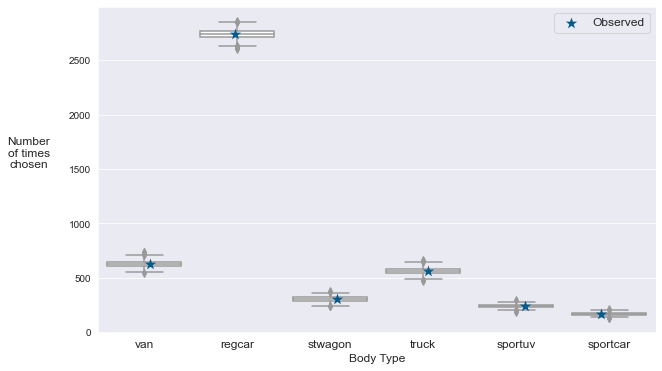

In [20]:
reload(viz)
viz.plot_simulated_market_shares(car_df.body_type.values,
                                 likelihood_sim_y,
                                 car_df.choice.values,
                                 x_label='Body Type',
                                 y_label='Number\nof times\nchosen')

### 3. Binned Reliability Plot

../src/visualization/predictive_viz.py:1791: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


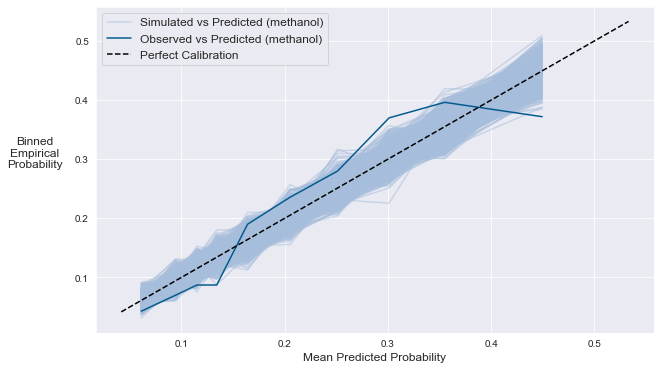

In [21]:
reload(viz)
current_fuel = 'methanol'
filter_idx = np.where((car_df.fuel_type == current_fuel).values)[0]
# current_probs = simulated_probs[filter_idx, :]
current_probs = car_mnl.long_fitted_probs[filter_idx]
current_choices = car_mnl.choices[filter_idx]
current_sim_y = likelihood_sim_y[filter_idx, :]
current_line_label = 'Observed vs Predicted ({})'.format(current_fuel)
current_sim_label = 'Simulated vs Predicted ({})'.format(current_fuel)

current_sim_color = '#a6bddb'
current_obs_color = '#045a8d'

# viz.plot_binned_reliability(
#     current_probs,
#     current_choices,
#     sim_y=current_sim_y,
#     line_label=current_line_label,
#     line_color=current_obs_color,
#     sim_label=current_sim_label,
#     sim_line_color=current_sim_color,
#     figsize=(10, 6),
#     ref_line=True,
#     output_file='../reports/figures/reliability-plot-vehicle-choice-mnl-methanol-point.pdf')

viz.plot_binned_reliability(
    current_probs,
    current_choices,
    sim_y=current_sim_y,
    line_label=current_line_label,
    line_color=current_obs_color,
    sim_label=current_sim_label,
    sim_line_color=current_sim_color,
    figsize=(10, 6),
    ref_line=True)

###  4. Binned Marginal Model Plot

../src/visualization/predictive_viz.py:2052: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


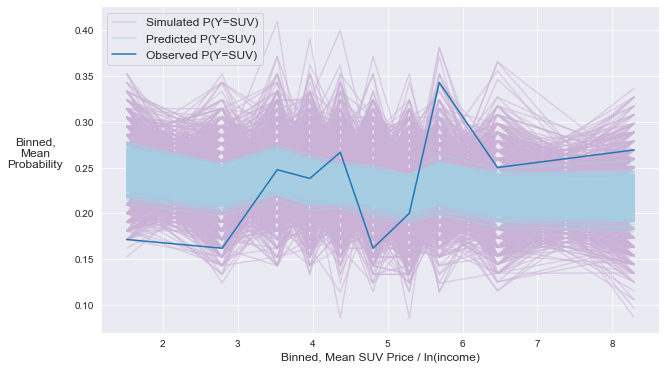

In [22]:
current_body = 'sportuv'
selection_idx = (car_df.body_type == current_body).values

current_probs = simulated_probs[selection_idx]
current_y = car_df.loc[selection_idx, 'choice'].values
current_x = car_df.loc[selection_idx, 'price_over_log_income'].values
current_sim_y = likelihood_sim_y[selection_idx]

# filename =\
#     '../reports/figures/marginal-model-plot-vehicle-choice-mnl-suv.pdf'
# filename =\
#     '../reports/figures/marginal-model-plot-vehicle-choice-mnl-suv.jpeg'
filename = None

viz.make_binned_marginal_model_plot(current_probs,
                                    current_y,
                                    current_x,
                                    partitions=10,
                                    sim_y=current_sim_y,
                                    y_label='Observed P(Y=SUV)',
                                    prob_label='Predicted P(Y=SUV)',
                                    sim_label='Simulated P(Y=SUV)',
                                    x_label='Binned, Mean SUV Price / ln(income)',
                                    alpha=0.5,
                                    figsize=(10, 6),
                                    output_file=filename)

/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


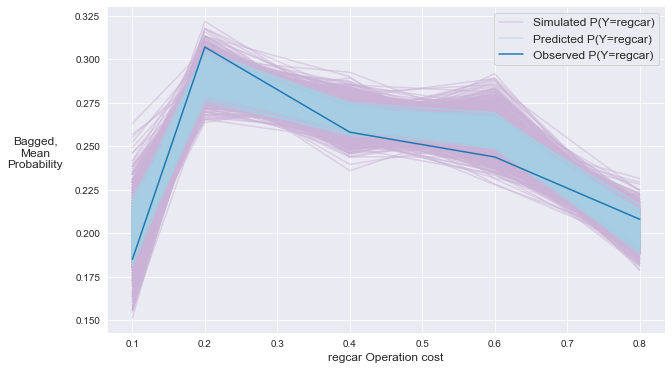

In [23]:
current_body = 'regcar'
selection_idx = (car_df.body_type == current_body).values

current_probs = simulated_probs[selection_idx]
current_y = car_df.loc[selection_idx, 'choice'].values

needed_column = car_mnl.params.index.tolist().index('Operation cost')
current_x = car_mnl.design[selection_idx, needed_column]
current_sim_y = likelihood_sim_y[selection_idx]


make_bagged_marginal_model_plot(current_probs,
                                current_y,
                                current_x,
                                partitions=10,
                                sim_y=current_sim_y,
                                y_label='Observed P(Y={})'.format(current_body),
                                prob_label='Predicted P(Y={})'.format(current_body),
                                sim_label='Simulated P(Y={})'.format(current_body),
                                x_label='{} Operation cost'.format(current_body),
                                alpha=0.5,
                                figsize=(10, 6))

/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


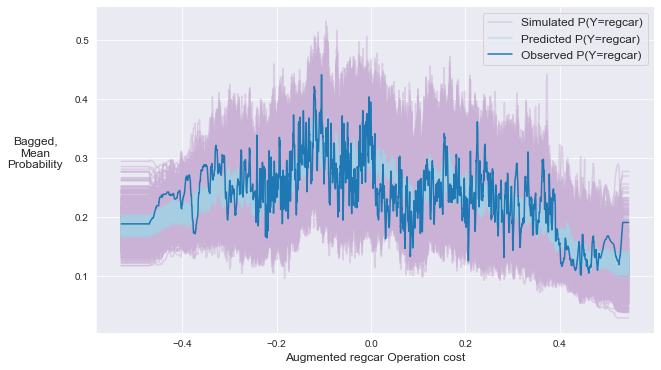

In [24]:
current_body = 'regcar'
selection_idx = (car_df.body_type == current_body).values

current_probs = simulated_probs[selection_idx]
current_y = car_df.loc[selection_idx, 'choice'].values

needed_column = car_mnl.params.index.tolist().index('Operation cost')
current_x = augmented_x[selection_idx, needed_column]
current_sim_y = likelihood_sim_y[selection_idx]


make_bagged_marginal_model_plot(current_probs,
                                current_y,
                                current_x,
                                partitions=10,
                                sim_y=current_sim_y,
                                y_label='Observed P(Y={})'.format(current_body),
                                prob_label='Predicted P(Y={})'.format(current_body),
                                sim_label='Simulated P(Y={})'.format(current_body),
                                x_label='Augmented {} Operation cost'.format(current_body),
                                alpha=0.5,
                                figsize=(10, 6))

/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


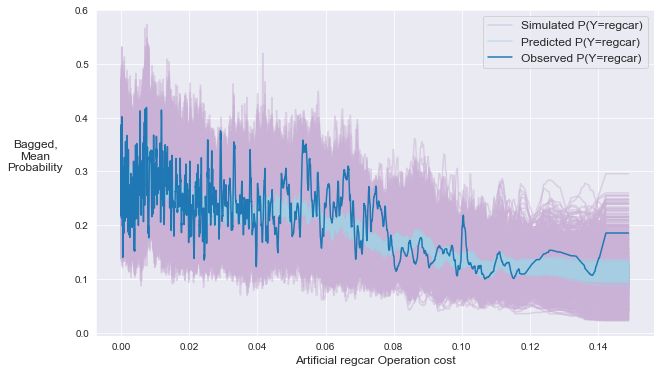

In [25]:
current_body = 'regcar'
selection_idx = (car_df.body_type == current_body).values

current_probs = simulated_probs[selection_idx]
current_y = car_df.loc[selection_idx, 'choice'].values

needed_column = car_mnl.params.index.tolist().index('Operation cost')
current_x = artificial_x[selection_idx, needed_column]
current_sim_y = likelihood_sim_y[selection_idx]


make_bagged_marginal_model_plot(current_probs,
                                current_y,
                                current_x,
                                partitions=10,
                                sim_y=current_sim_y,
                                y_label='Observed P(Y={})'.format(current_body),
                                prob_label='Predicted P(Y={})'.format(current_body),
                                sim_label='Simulated P(Y={})'.format(current_body),
                                x_label='Artificial {} Operation cost'.format(current_body),
                                alpha=0.5,
                                figsize=(10, 6))

/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


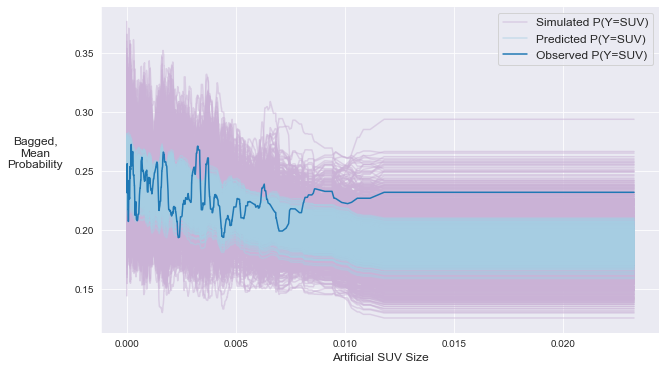

In [26]:
current_body = 'sportuv'
selection_idx = (car_df.body_type == current_body).values

current_probs = simulated_probs[selection_idx]
current_y = car_df.loc[selection_idx, 'choice'].values

needed_column = car_mnl.params.index.tolist().index('Size')
current_x = artificial_x[selection_idx, needed_column]
current_sim_y = likelihood_sim_y[selection_idx]


make_bagged_marginal_model_plot(current_probs,
                                current_y,
                                current_x,
                                partitions=10,
                                sim_y=current_sim_y,
                                y_label='Observed P(Y=SUV)',
                                prob_label='Predicted P(Y=SUV)',
                                sim_label='Simulated P(Y=SUV)',
                                x_label='Artificial SUV Size',
                                alpha=0.5,
                                figsize=(10, 6))

/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:255: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/timothyb0912/anaconda/envs/replicaAssgnmt/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KeyboardInterrupt: 

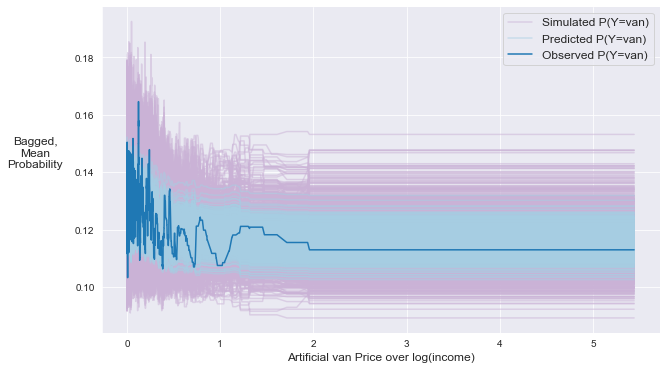

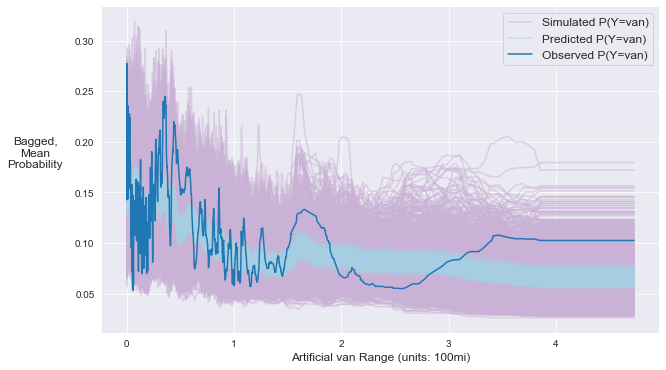

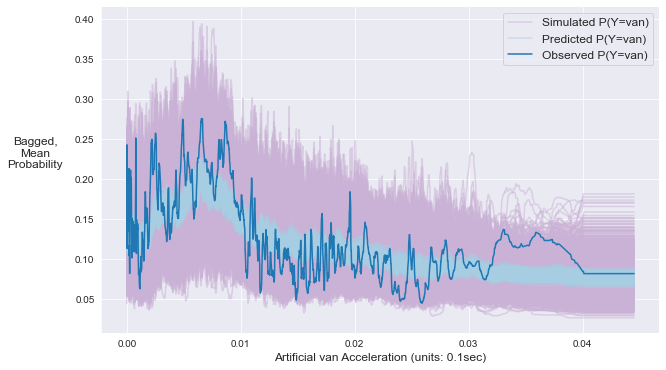

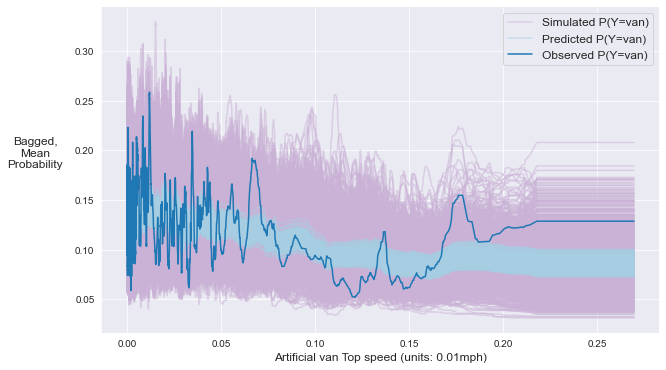

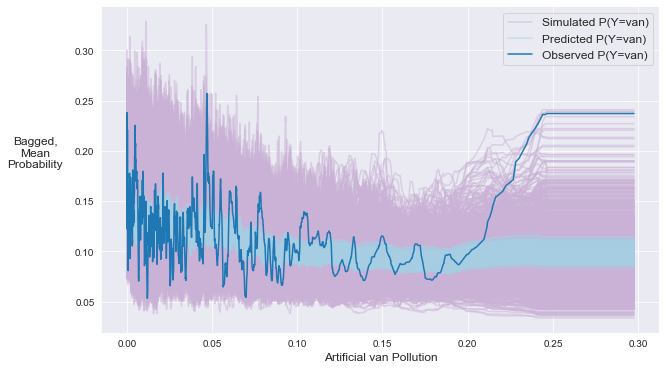

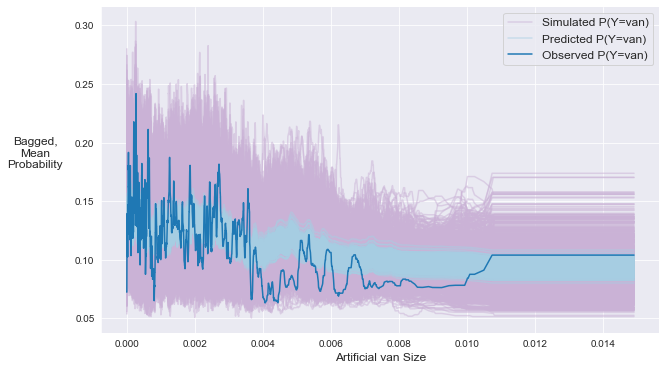

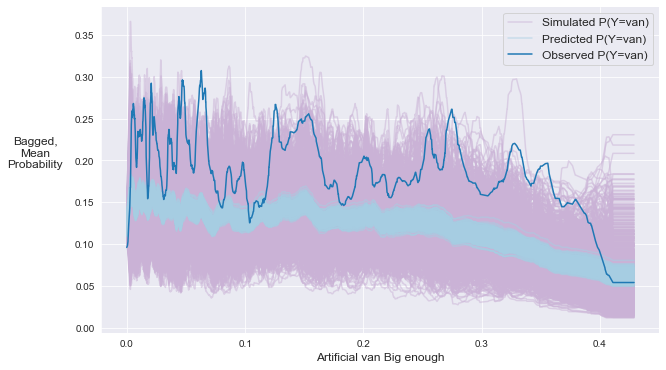

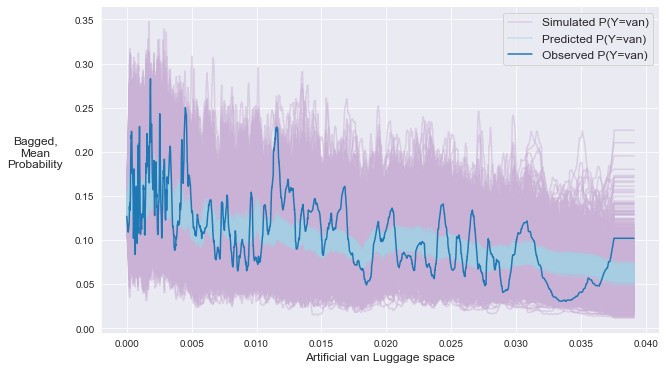

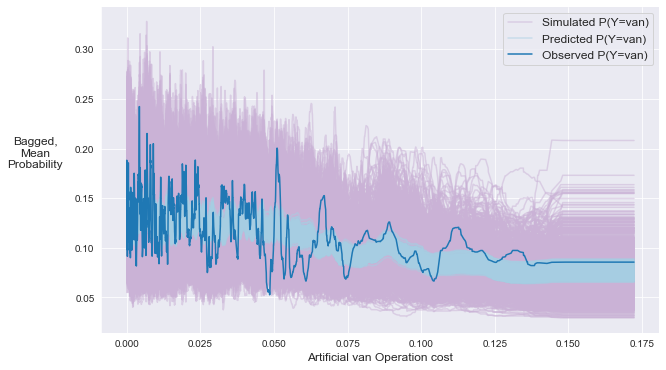

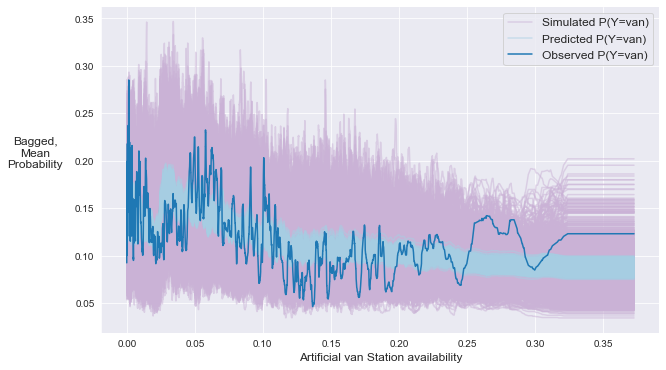

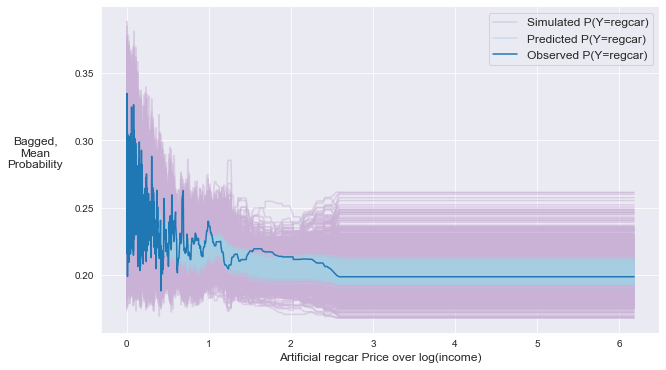

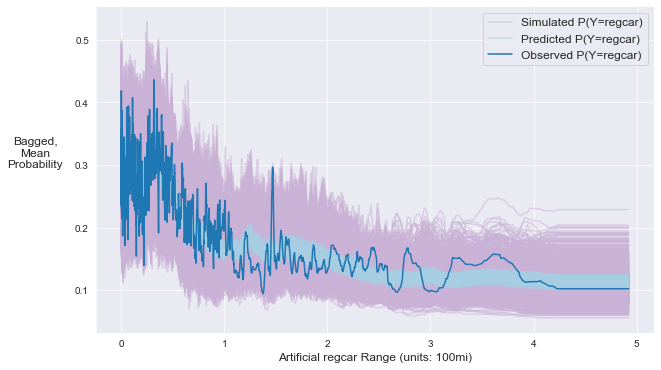

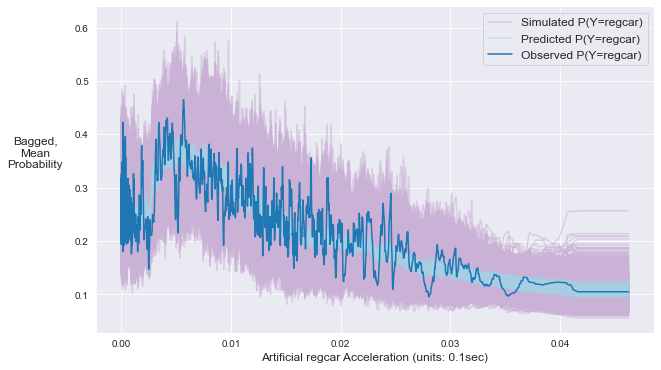

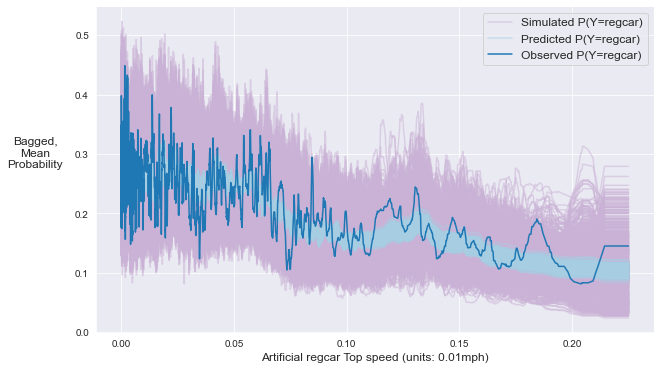

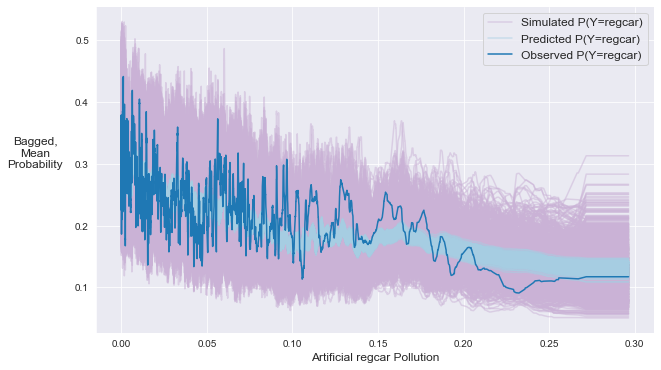

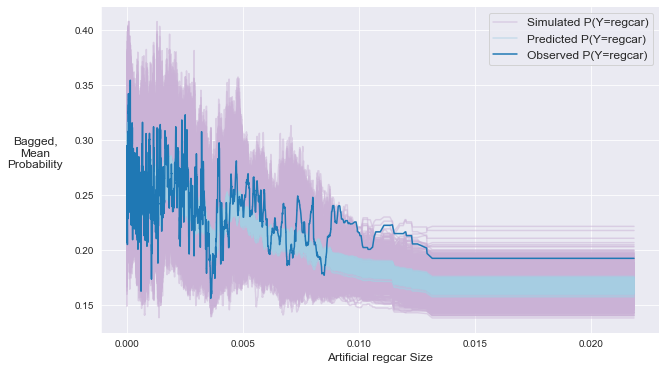

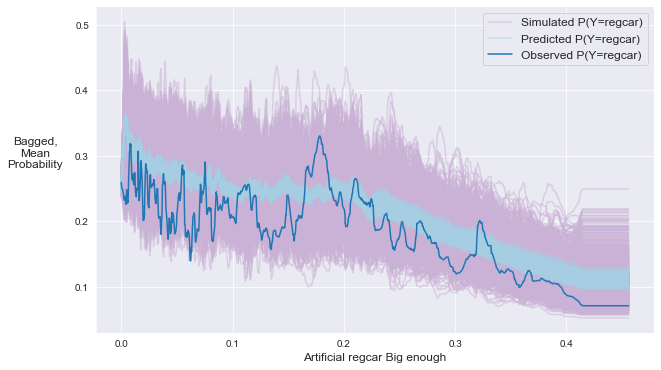

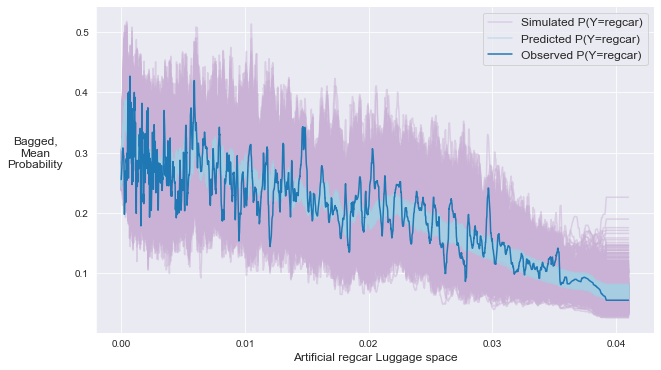

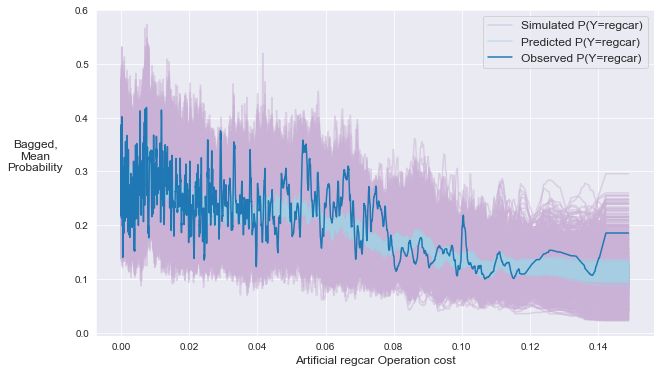

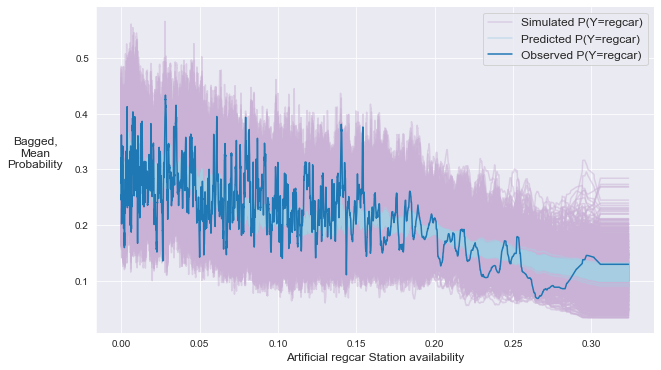

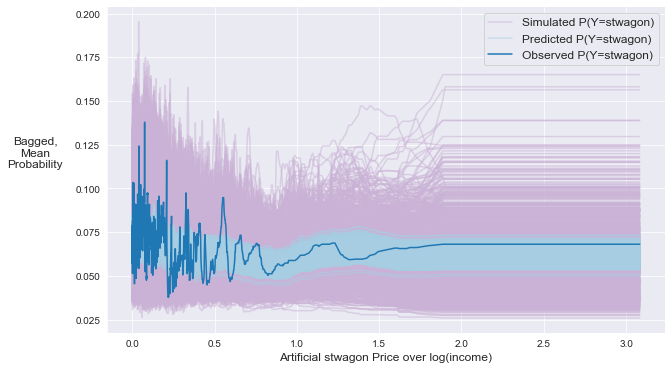

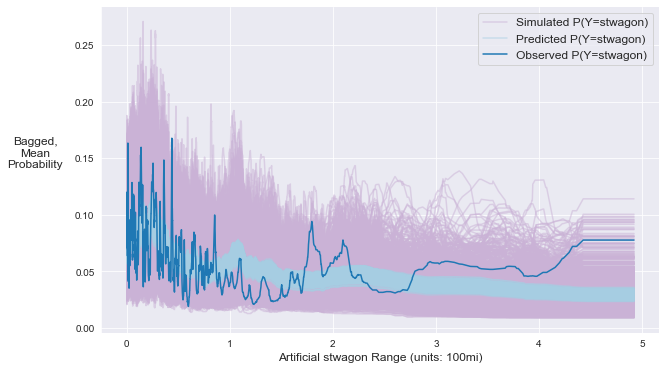

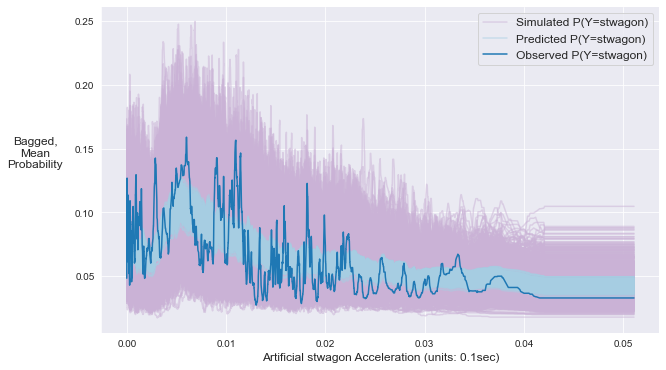

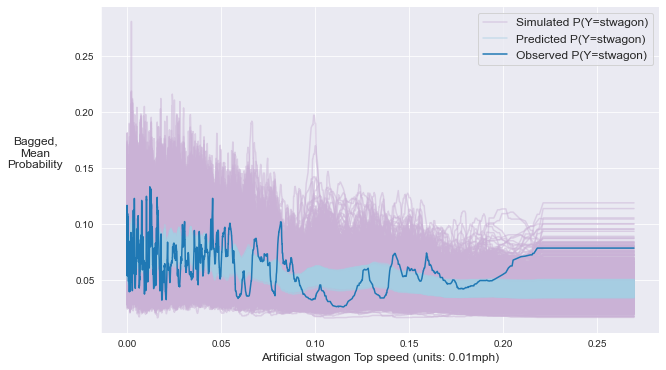

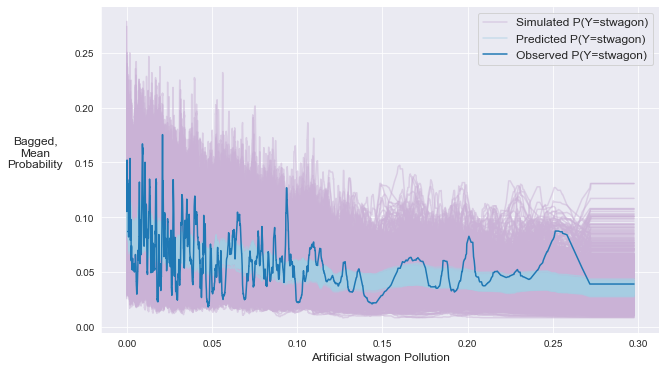

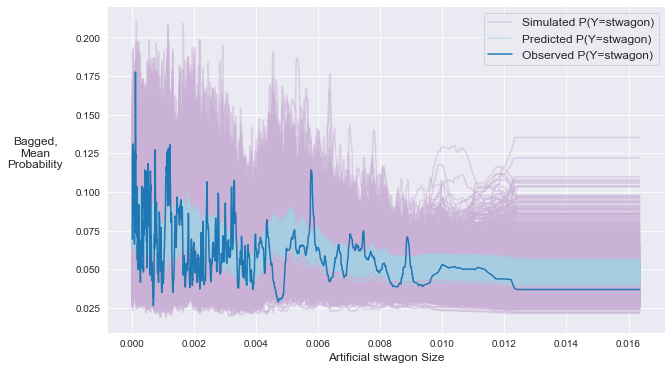

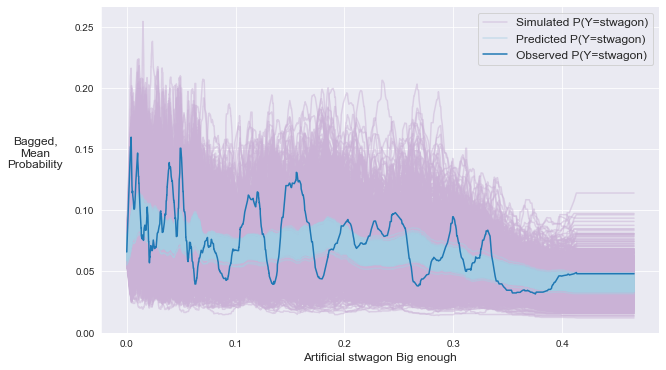

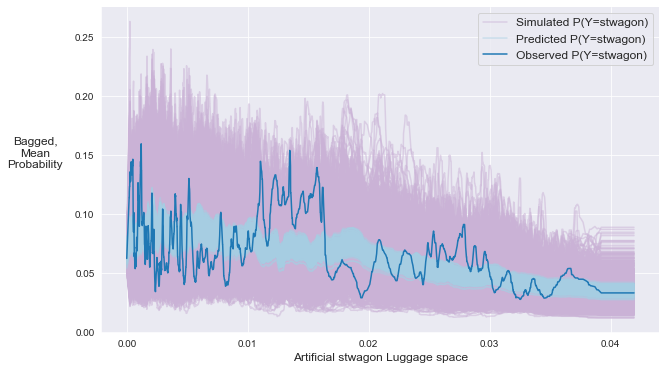

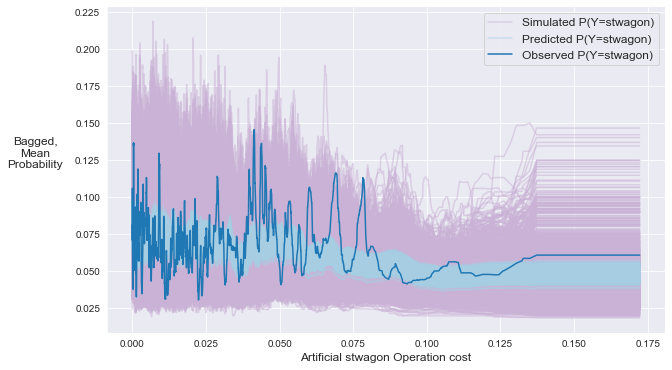

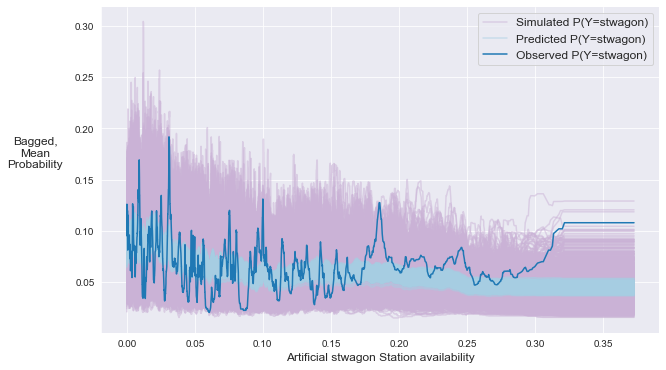

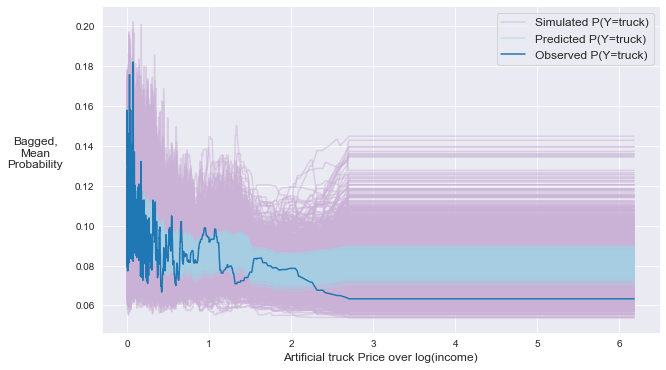

Error in callback <function flush_figures at 0x12640dbf8> (for post_execute):


KeyboardInterrupt: 

In [27]:
# possible_bodies = car_df.body_type.unique()
# possible_cols = car_mnl.ind_var_names[:10]

# for current_body in possible_bodies:
#     for current_col in possible_cols:
#         selection_idx = (car_df.body_type == current_body).values

#         current_probs = simulated_probs[selection_idx]
#         current_y = car_df.loc[selection_idx, 'choice'].values

#         needed_column = car_mnl.params.index.tolist().index(current_col)
#         current_x = artificial_x[selection_idx, needed_column]
#         current_sim_y = likelihood_sim_y[selection_idx]


#         make_bagged_marginal_model_plot(current_probs,
#                                         current_y,
#                                         current_x,
#                                         partitions=10,
#                                         sim_y=current_sim_y,
#                                         y_label='Observed P(Y={})'.format(current_body),
#                                         prob_label='Predicted P(Y={})'.format(current_body),
#                                         sim_label='Simulated P(Y={})'.format(current_body),
#                                         x_label='Artificial {} {}'.format(current_body, current_col),
#                                         alpha=0.5,
#                                         figsize=(10, 6))

### 5. Simulated Histogram

In [ ]:
reload(viz)

filter_row = ((car_df.body_type == 'regcar') &
              (car_df.cents_per_mile == 2))
# current_title = 'Num Observations by Cents per Mile for Body = {}'
current_title = ''
# filename =\
#     '../reports/figures/histogram-vehicle-choice-mnl-regcar-operating-costs.pdf'
filename = None

viz.plot_categorical_predictive_densities(
    car_df,
    None,
    likelihood_sim_y,
    'cents_per_mile',
    filter_row,
    car_mnl.choices,
    title=current_title.format('Regular Car'),
    filter_name='observations',
    post_color=sbn.color_palette('colorblind')[0],
    figsize=(10, 6),
    legend_loc='upper left',
    output_file=filename)

### 6. Simulated KDE

In [ ]:
reload(viz)
current_fuel = 'electric'
filter_row = car_df.fuel_type == current_fuel
# current_title = 'KDE of Price/log(income) for {} vehicles'
current_title = ''
filename = None

viz.plot_simulated_kde_traces(likelihood_sim_y,
                              car_df,
                              filter_row,
                              'price_over_log_income',
                              'choice',
                              title=current_title.format(current_fuel),
                              figsize=(10, 6),
                              label='Simulated',
                              n_traces=500,
                              output_file=filename)

### 7. Simulated CDF

In [ ]:
reload(viz)
current_body = 'sportuv'
filter_row = car_df.body_type == current_body
# current_title =\
#     'CDF of Price/log(income) for Sport Utility Vehicles'
current_title = ''
filename = None

viz.plot_simulated_cdf_traces(likelihood_sim_y,
                              car_df,
                              filter_row,
                              'price_over_log_income',
                              'choice',
                              label='Simulated',
                              title=current_title,
                              figsize=(10, 6),
                              output_file=filename)

## Sandbox:
Look at additional plots.

In [ ]:
for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    current_body = body
    selection_idx = (car_df.body_type == current_body).values

    current_probs = simulated_probs[selection_idx]
    current_y = car_df.loc[selection_idx, 'choice'].values
    current_x = car_df.loc[selection_idx, 'price_over_log_income'].values
    current_sim_y = likelihood_sim_y[selection_idx]

    filename = None

    viz.make_binned_marginal_model_plot(current_probs,
                                        current_y,
                                        current_x,
                                        partitions=10,
                                        sim_y=current_sim_y,
                                        y_label='Observed P(Y={})'.format(body),
                                        prob_label='Predicted P(Y={})'.format(body),
                                        sim_label='Simulated P(Y={})'.format(body),
                                        x_label='Binned, Mean {} Price / ln(income)'.format(body),
                                        alpha=0.5,
                                        figsize=(10, 6),
                                        output_file=filename)

In [ ]:
for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    current_body = body
    filter_row = car_df.body_type == current_body
    # current_title =\
    #     'CDF of Price/log(income) for Sport Utility Vehicles'
    current_title = ''
    filename = None
    viz.plot_simulated_cdf_traces(likelihood_sim_y,
                                  car_df,
                                  filter_row,
                                  'price_over_log_income',
                                  'choice',
                                  label='Simulated ({})'.format(body),
                                  title=current_title,
                                  figsize=(10, 6),
                                  output_file=filename)

In [ ]:
for body in ['regcar', 'sportcar', 'stwagon', 'van', 'truck']:
    filter_idx = (car_df.body_type == body).values
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices = car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, :]
    current_line_label = 'Observed vs Predicted ({})'.format(body)
    current_sim_label = 'Simulated vs Predicted ({})'.format(body)

    current_sim_color = '#a6bddb'
    current_obs_color = '#045a8d'

    reliability_path = None
    viz.plot_binned_reliability(
        current_probs,
        current_choices,
        sim_y=current_sim_y,
        line_label=current_line_label,
        line_color=current_obs_color,
        sim_label=current_sim_label,
        sim_line_color=current_sim_color,
        figsize=(10, 6),
        ref_line=True,
        output_file=reliability_path)

In [ ]:
for fuel in ['cng', 'electric', 'gasoline']:
    current_fuel = fuel
    filter_idx = np.where((car_df.fuel_type == current_fuel).values)[0]
    current_probs = car_mnl.long_fitted_probs[filter_idx]
    current_choices = car_mnl.choices[filter_idx]
    current_sim_y = likelihood_sim_y[filter_idx, :]
    current_line_label = 'Observed vs Predicted ({})'.format(current_fuel)
    current_sim_label = 'Simulated vs Predicted ({})'.format(current_fuel)

    current_sim_color = '#a6bddb'
    current_obs_color = '#045a8d'

    reliability_path = None
    viz.plot_binned_reliability(
        current_probs,
        current_choices,
        sim_y=current_sim_y,
        line_label=current_line_label,
        line_color=current_obs_color,
        sim_label=current_sim_label,
        sim_line_color=current_sim_color,
        figsize=(10, 6),
        ref_line=True,
        output_file=reliability_path)